<a href="https://colab.research.google.com/github/Ridhi655/Linear-regression-model/blob/main/Ground_Cricket_Chirps_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
df.shape

(15, 2)

In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


Median and mean are closer to each other - there is less skew in the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [ ]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
df=df.drop_duplicates()
df.shape

(15, 2)

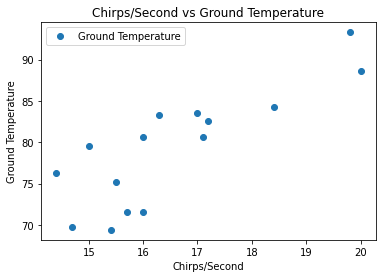

In [ ]:
df.plot(x='Chirps/Second',y='Ground Temperature',style='o')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


There is a linear relationship between 	Chirps/Second and Ground Temperature => we can go ahead and develop a linear regression model. No transformation required.




In [ ]:
df['Ground Temperature'].values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])


Preparing the data

In [ ]:
X=df.loc[:,['Chirps/Second']].values
y=df.loc[:,'Ground Temperature'].values

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [ ]:
#X_train.shape,X_test.shape

In [ ]:
#y_test

Modelling
1. Find the linear regression equation for this data.

In [ ]:
#Model for algorithm - Ground Temperature = (m * Chirps/Second) + c

In [ ]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
#linreg.fit(X_train,y_train)
linreg.fit(X,y)

LinearRegression()

In [ ]:
print(linreg.intercept_)

22.848982308066887


In [ ]:
print(linreg.coef_)

[3.410323]


In [ ]:
#y_pred=linreg.predict(X_test)
#y_pred


In [ ]:
#df=pd.DataFrame({'Chirps/Second':y_test,'Ground Temperature':y_pred})
#df

2. Chart the original data and the equation on the chart.

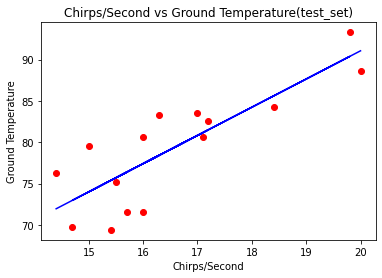

In [ ]:
plt.scatter(X, y,color='red')
plt.plot(X, linreg.predict(X),color='blue')
plt.title('Chirps/Second vs Ground Temperature(test_set)')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()



METRICS

3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
from sklearn import metrics
print('R2-score:',linreg.score(X, y))

R2-score: 0.6922946529147003


4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [ ]:
(95-linreg.intercept_)/linreg.coef_

array([21.15665223])

5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
linreg.predict([[18]])

array([84.2347963])